In [5]:
# Importing required libraries

# 📊 Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Load the dataset
df = pd.read_csv("../data/heart.csv")

In [7]:
# Display first 5 rows
print("🔹 First 5 Rows of Data:")
display(df.head())

🔹 First 5 Rows of Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Basic info
print("🔹 Dataset Info:")
df.info()

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# Summary statistics
print("🔹 Summary Statistics:")
display(df.describe())

🔹 Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Check for missing values
print("🔹 Missing Values:")
print(df.isnull().sum())

🔹 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

C:\Users\my pc\AppData\Local\Temp\ipykernel_31212\2218517508.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="bwr")


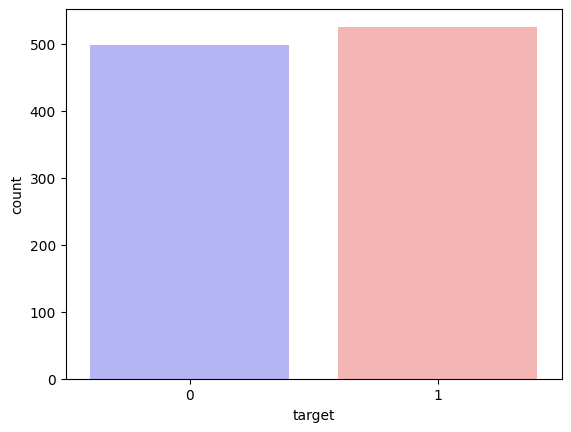

In [16]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [17]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


C:\Users\my pc\AppData\Local\Temp\ipykernel_31212\1879341537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="mako_r")


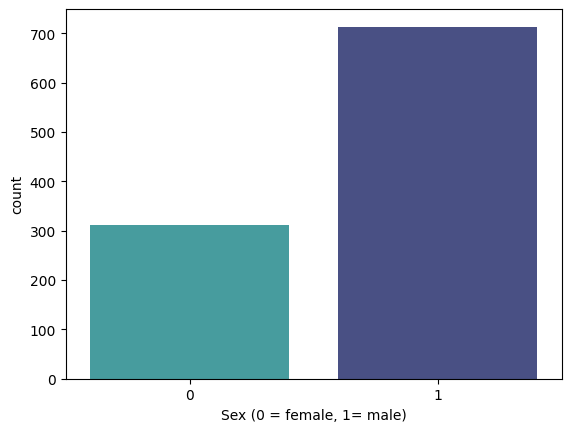

In [18]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [19]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [20]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


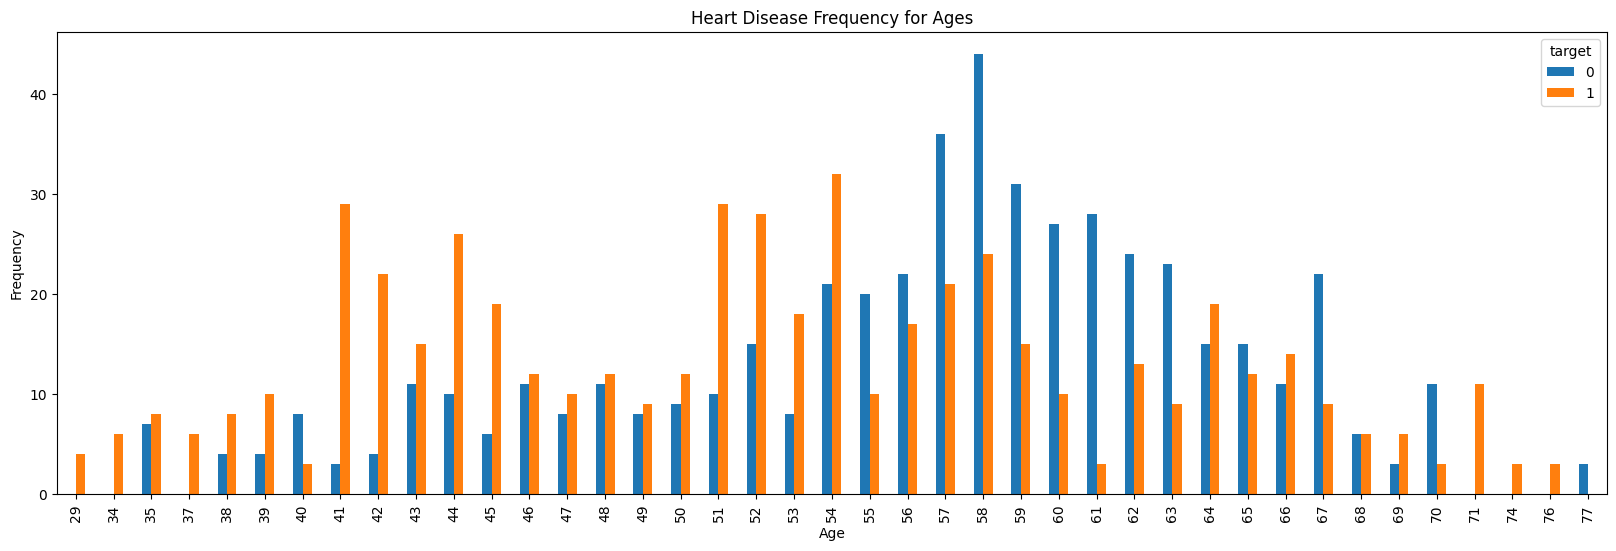

In [21]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

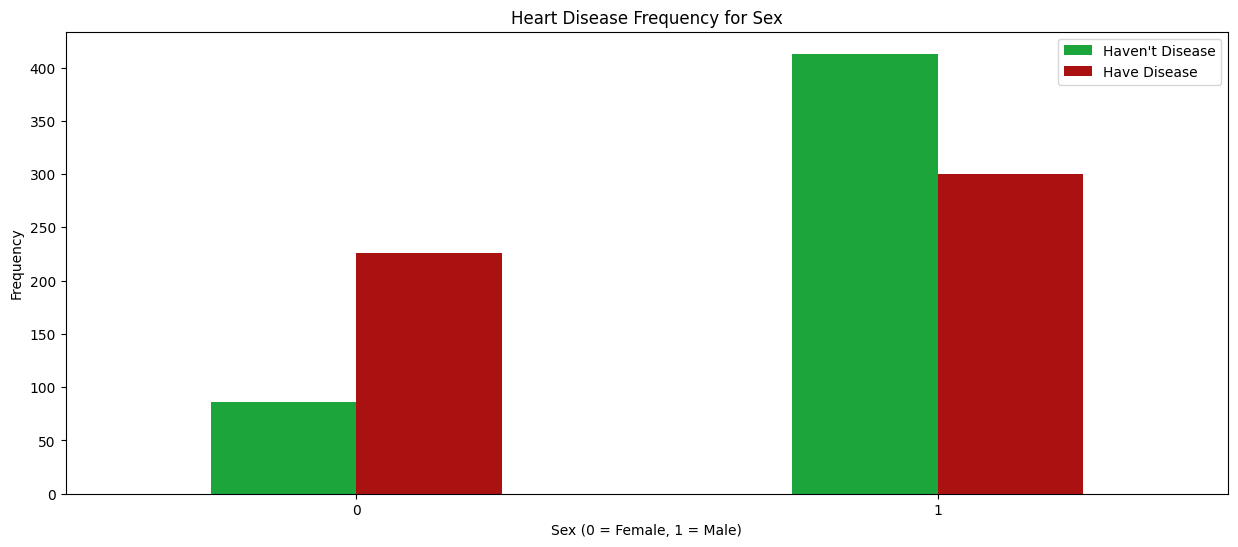

In [22]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

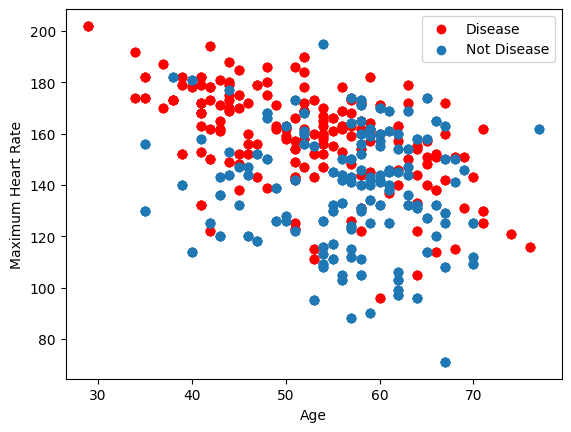

In [23]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

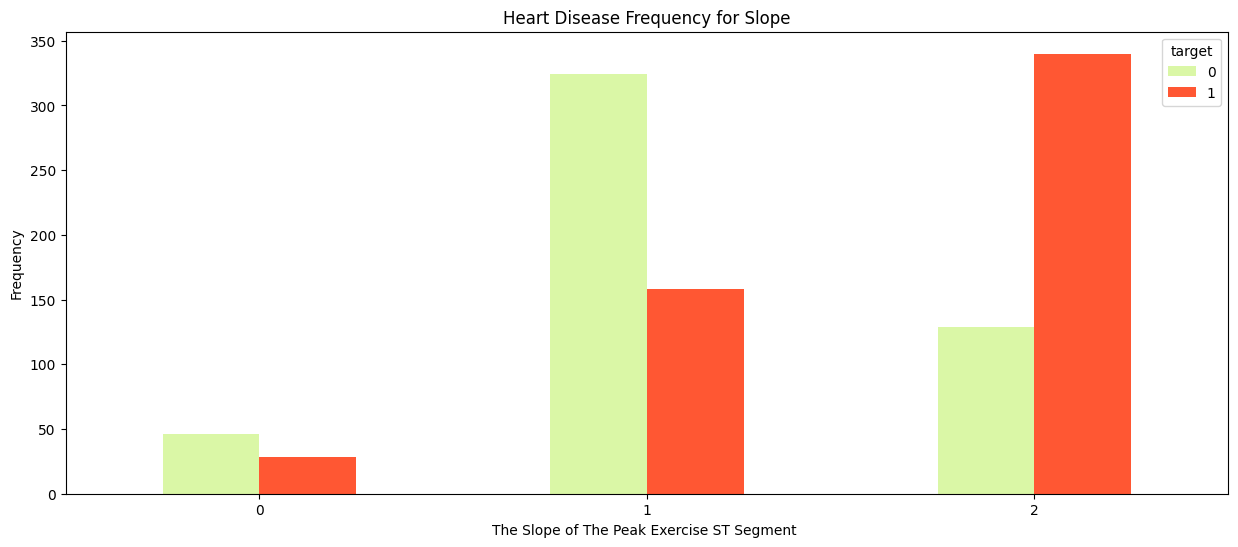

In [24]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

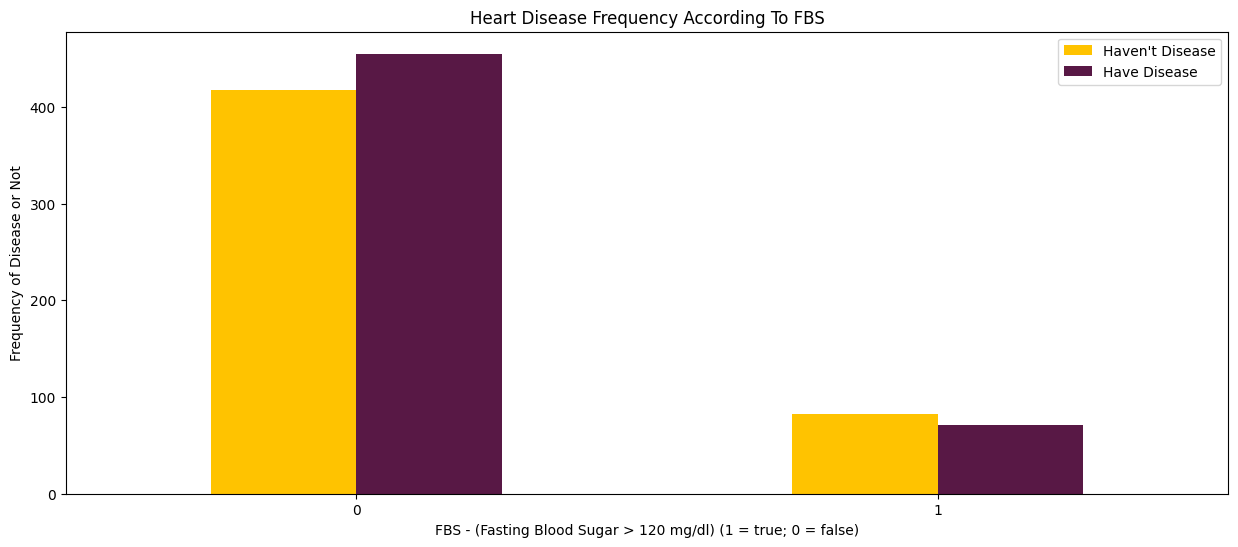

In [25]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

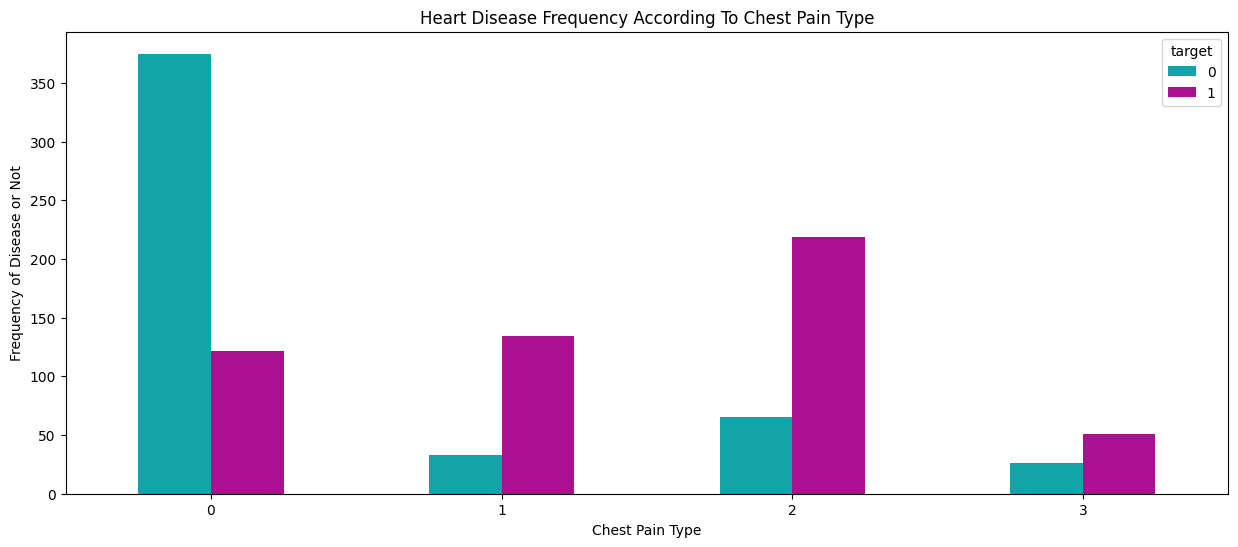

In [27]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [28]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [29]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [30]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


🔹 Target Variable Distribution:


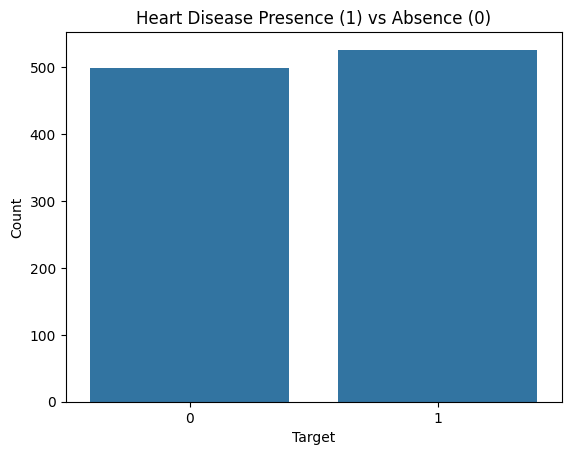

In [26]:
# Target class distribution
print("🔹 Target Variable Distribution:")
sns.countplot(data=df, x='target')
plt.title('Heart Disease Presence (1) vs Absence (0)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

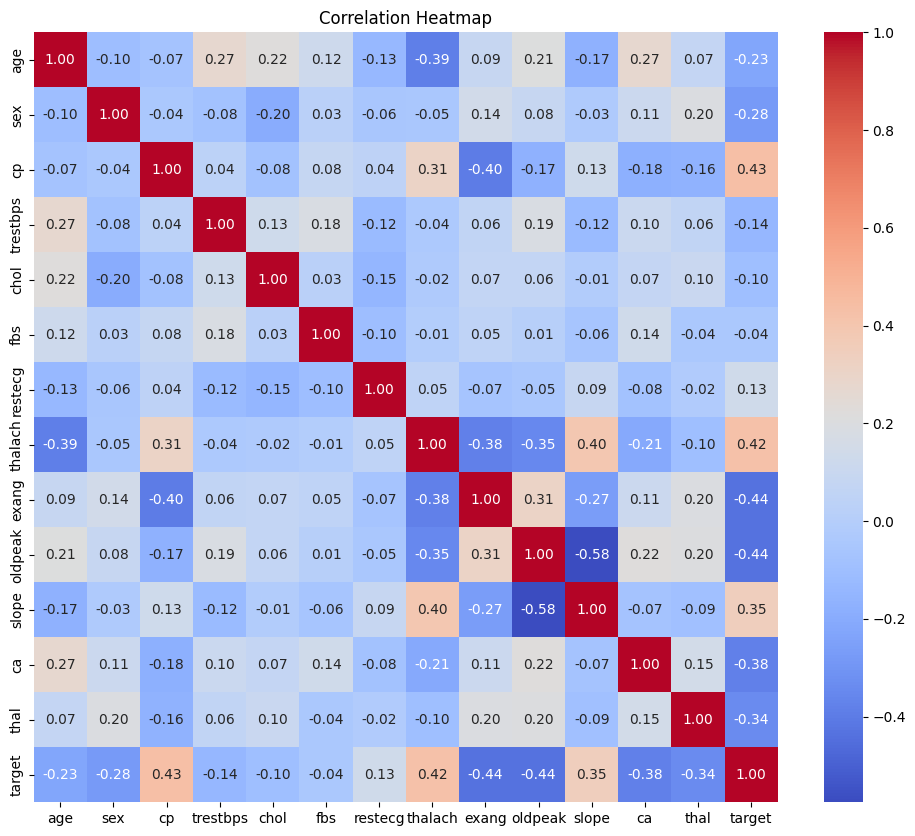

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

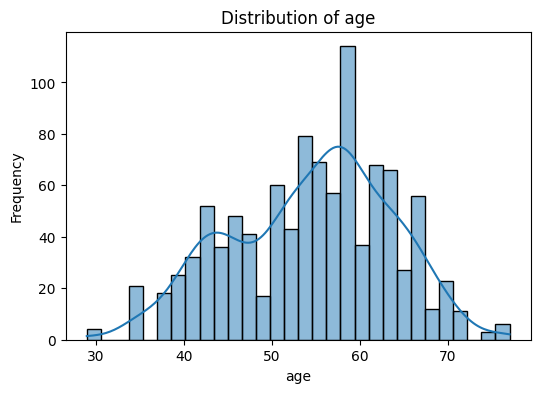

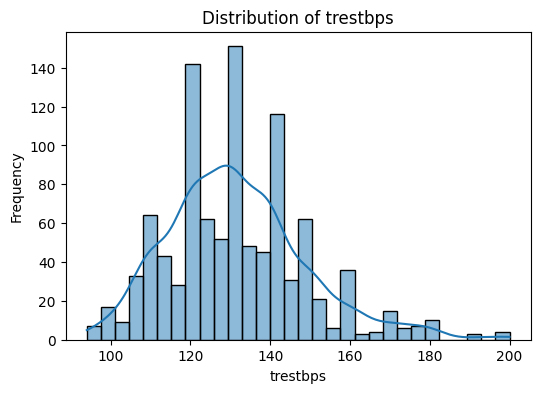

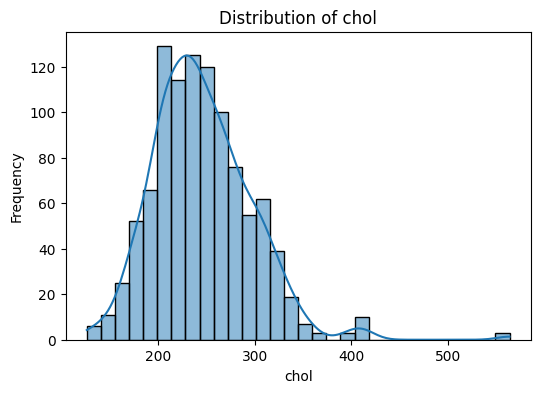

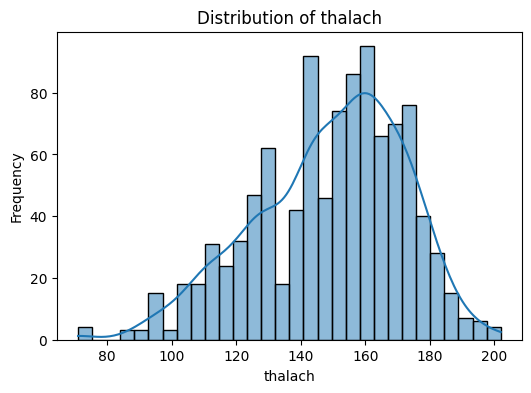

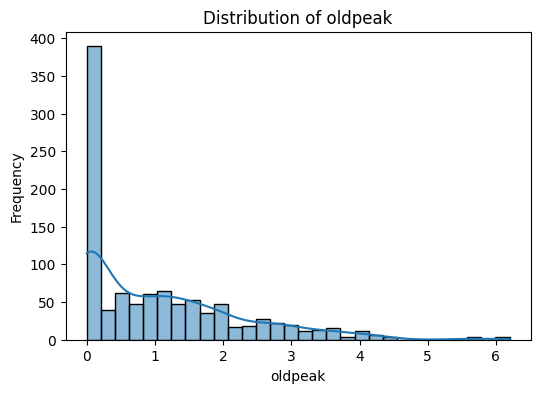

In [11]:
# Distribution of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

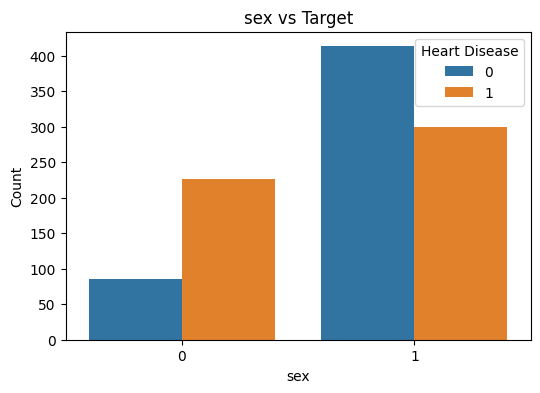

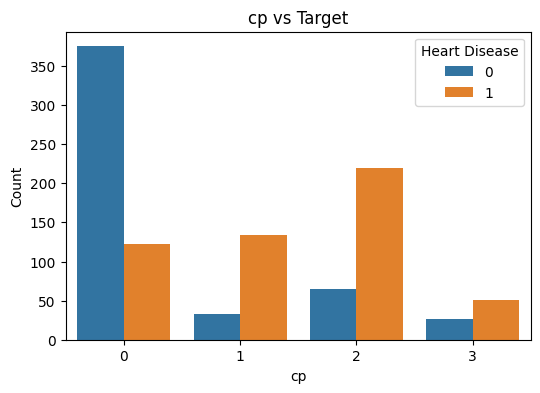

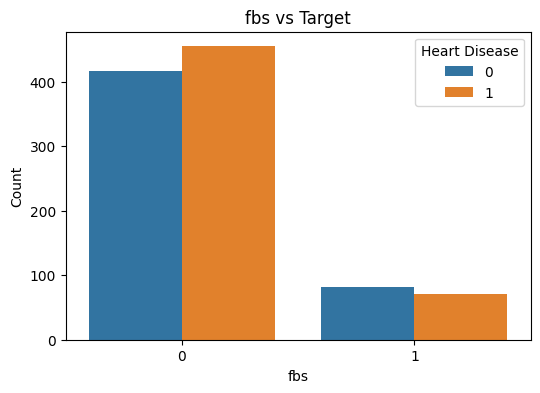

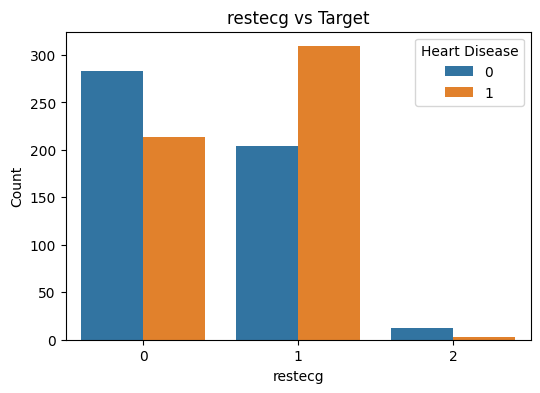

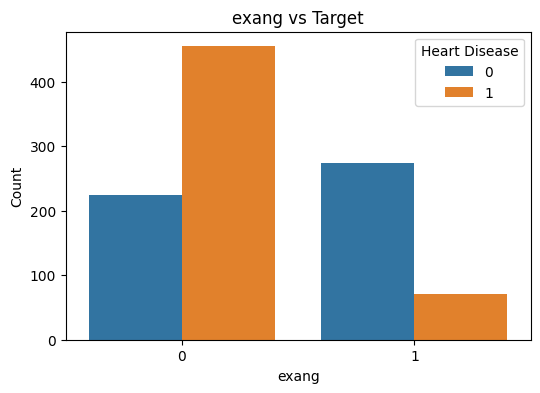

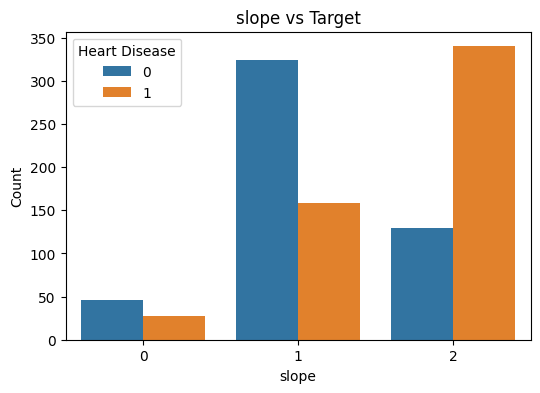

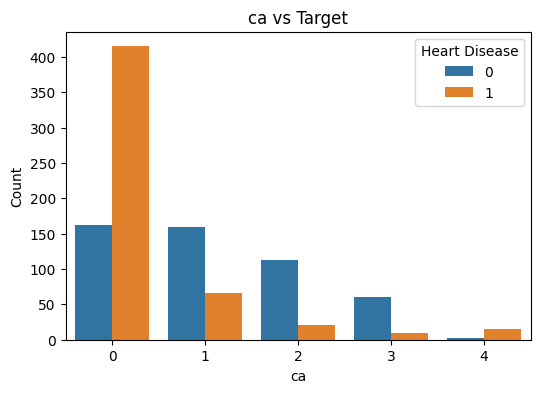

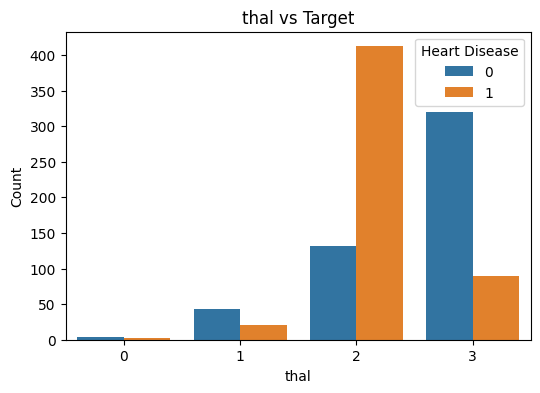

In [12]:
# Count plots of categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease")
    plt.show()

## 🧹 Data Preprocessing

### 🔧 Handling Missing Values

In [1]:
# No missing values in this dataset
# df.fillna(method='ffill', inplace=True)

### 📐 Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🔢 Encoding Categorical Variables

In [14]:
# All features are numeric in this dataset
# pd.get_dummies(df) or LabelEncoder

## 📌 Feature Selection

In [15]:
# Correlation and domain knowledge used for feature selection
selected_features = X.columns.tolist()

## 🧠 Model Building

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### 🔹 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 🔹 Decision Tree

In [18]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 🔹 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 🔹 K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 🔹 Support Vector Machine

In [21]:

from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 📊 Model Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'KNN': knn, 'SVM': svm}

for name, model in models.items():
    print(f"📌 {name}")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("="*50)


📌 Logistic Regression
[[70 30]
 [ 9 96]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

ROC-AUC: 0.9297142857142857
📌 Decision Tree
[[100   0]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

ROC-AUC: 0.9857142857142858
📌 Random Forest
[[100   0]
 [  0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    acc

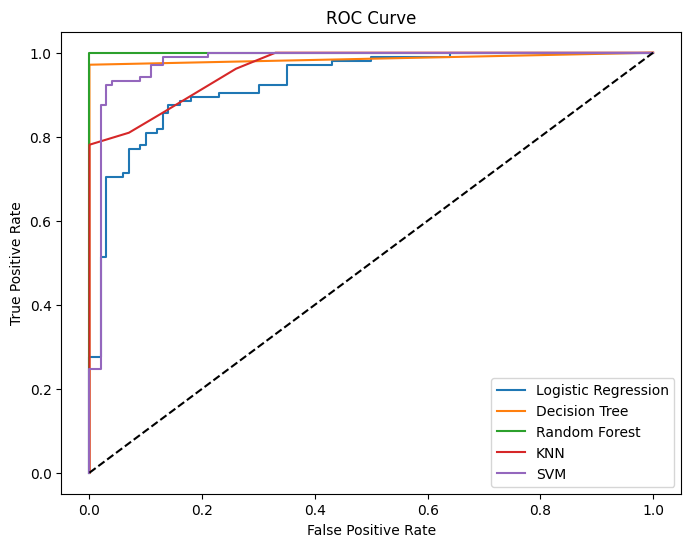

In [23]:

from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 🛠️ Hyperparameter Tuning (Example: Random Forest)

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.9853658536585366
